In [ ]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#load the dataset
df = pd.read_csv("data.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
#% of missing values per column
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

**df.isnull().sum()**

**.isnull().sum()** returns a DataFrame where each cell is either True or False depending on that cell's null status.

To count the number of nulls in each column i use an aggregate function to calculate the parcentages of null value per each column

In [ ]:
#Count the number of duplicates in the dataset
df.duplicated().sum()

0

<Axes: >

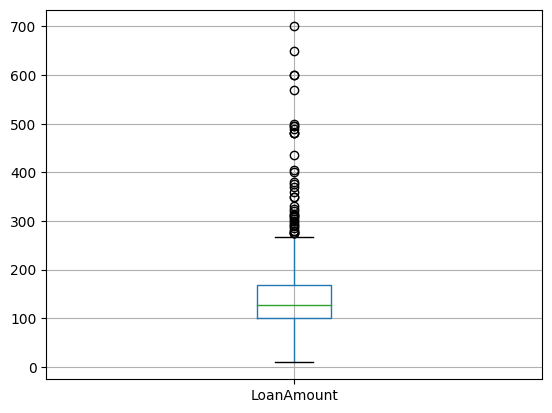

In [ ]:
#Checking the ouliers in amount column
Applinc_df = df.boxplot(column = 'LoanAmount')
Applinc_df

 There is so much ouliers in Loan amount column,

In [ ]:
#dealing with oulier, from 0.01 to 0.99 parcent
Q1=df['LoanAmount'].quantile(0.01)
Q3=df['LoanAmount'].quantile(0.99)
df=df[df['LoanAmount']<=Q3]
df=df[df['LoanAmount']>=Q1]

<Axes: >

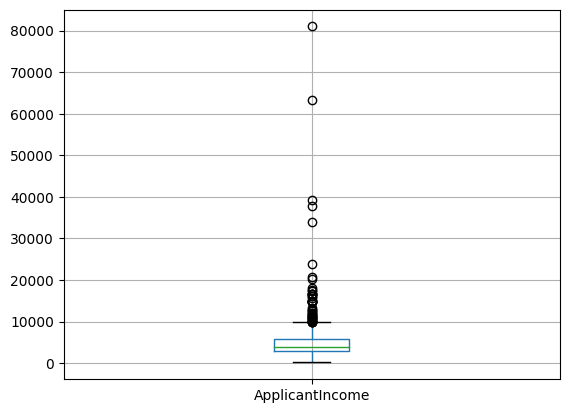

In [ ]:
AppInc = df.boxplot(column = 'ApplicantIncome')
AppInc

In [ ]:
#dealing with oulier, from 0.01 to 0.99 parcent
Q1=df['ApplicantIncome'].quantile(0.01)
Q3=df['ApplicantIncome'].quantile(0.99)
df=df[df['ApplicantIncome']<=Q3]
df=df[df['ApplicantIncome']>=Q1]

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,569.000000,569.000000,569.000000,555.000000,522.000000
mean,4800.882250,1585.096520,140.998243,343.351351,0.840996
std,3121.892926,2490.016162,68.725559,63.004305,0.366030
min,1025.000000,0.000000,30.000000,12.000000,0.000000
25%,2895.000000,0.000000,100.000000,360.000000,1.000000
50%,3775.000000,1255.000000,127.000000,360.000000,1.000000
75%,5695.000000,2302.000000,164.000000,360.000000,1.000000
max,20833.000000,33837.000000,496.000000,480.000000,1.000000


<Axes: >

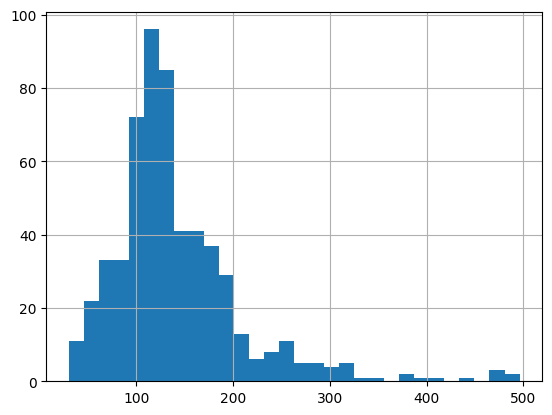

In [ ]:
LoanAmount = df['LoanAmount'].hist(bins = 30)
LoanAmount

<Axes: >

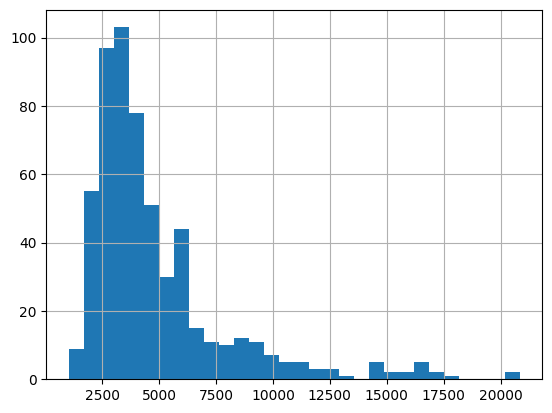

In [ ]:
applinc = df['ApplicantIncome'].hist(bins = 30)
applinc

Seeing that we have some of null value in this dataset i would like to deal per column

In [ ]:
df['Gender']=df['Gender'].replace(np.nan,'Male')

In [ ]:
#All the nan value will be replace with 0
df['Credit_History']=df['Credit_History'].replace(np.nan,'0')

In [ ]:
df['Gender'].value_counts(normalize=True)*100

Male      81.72232
Female    18.27768
Name: Gender, dtype: float64

In [ ]:
df['Married'].value_counts(normalize=True)*100

Yes    64.726631
No     35.273369
Name: Married, dtype: float64

In [ ]:
df['Self_Employed'].value_counts(normalize=True)*100

No     86.50647
Yes    13.49353
Name: Self_Employed, dtype: float64

In [ ]:
df['Property_Area'].value_counts(normalize=True)*100

Semiurban    38.488576
Urban        32.161687
Rural        29.349736
Name: Property_Area, dtype: float64

In [ ]:
df['Loan_Status'].value_counts(normalize=True)*100

Y    69.595782
N    30.404218
Name: Loan_Status, dtype: float64

In [ ]:
df['Dependents']=df['Dependents'].replace(np.nan,'0')
df['Dependents']=df['Dependents'].replace('3+' , '3')

In [ ]:
df.dropna(inplace= True)

In [ ]:
features =['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

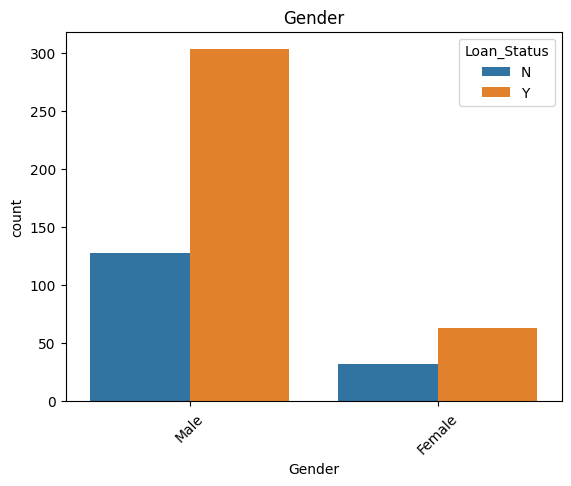

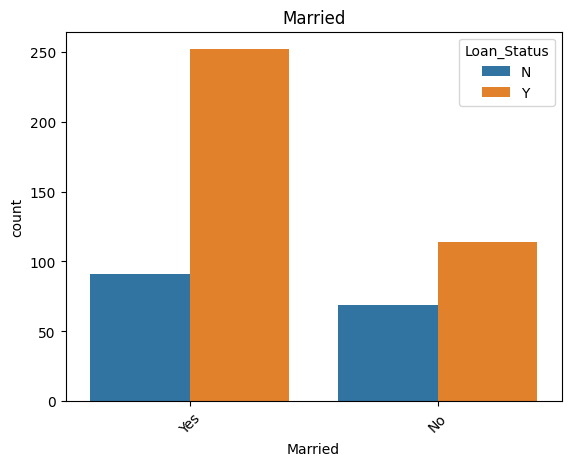

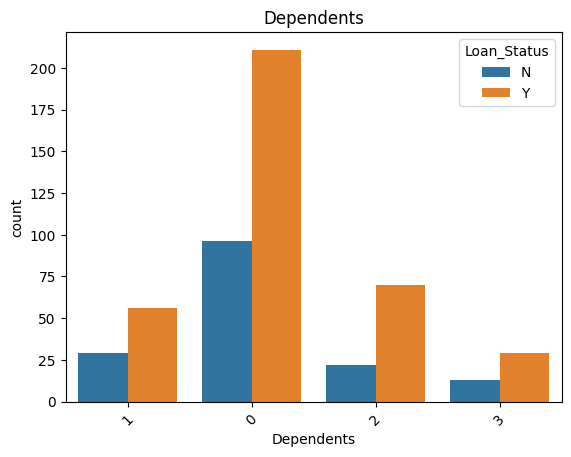

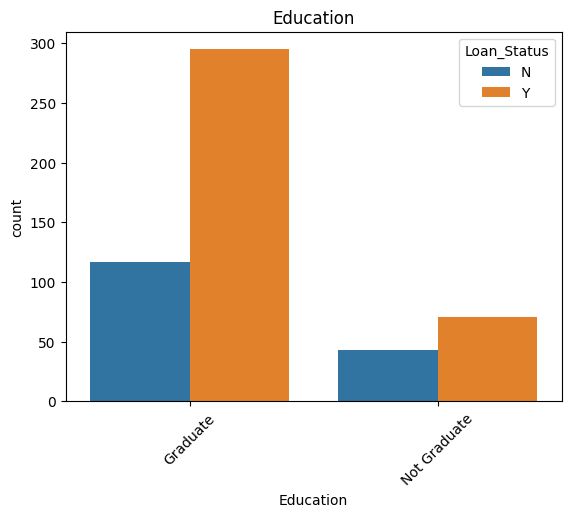

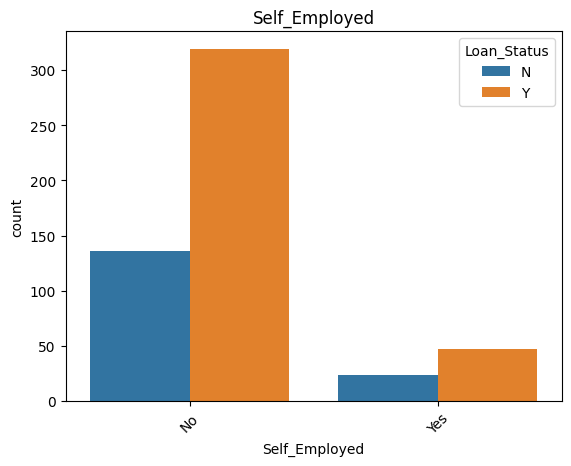

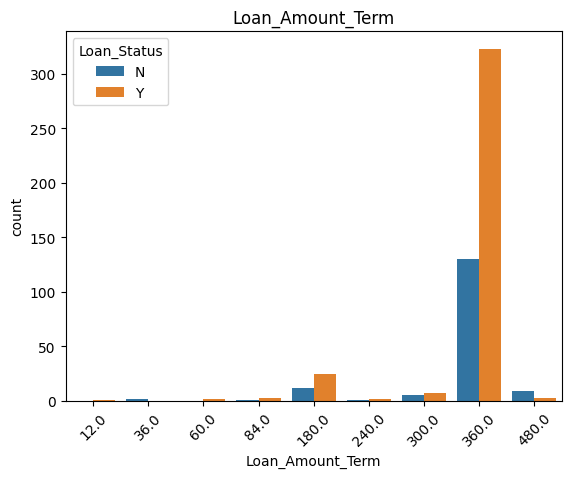

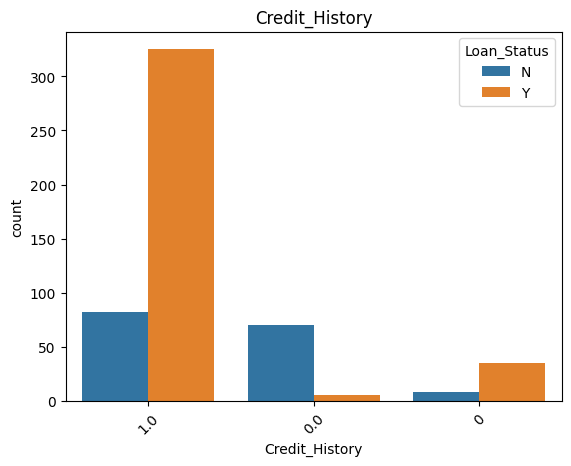

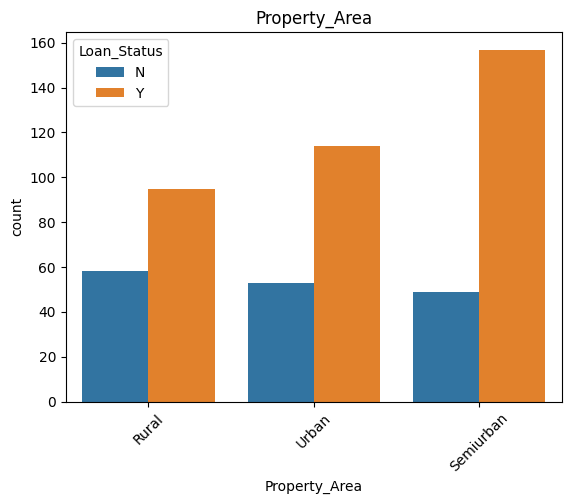

In [ ]:
#Viz all the features columns
for c in features:
    sns.countplot(data=df, x = df[c], hue=df['Loan_Status'])
    plt.xticks(rotation=45)
    plt.title(f"{c}")
    plt.show()

In [ ]:
#select the folowing columns scatterplot visualisation
numeric_features = ['Loan_Amount_Term','LoanAmount','CoapplicantIncome']

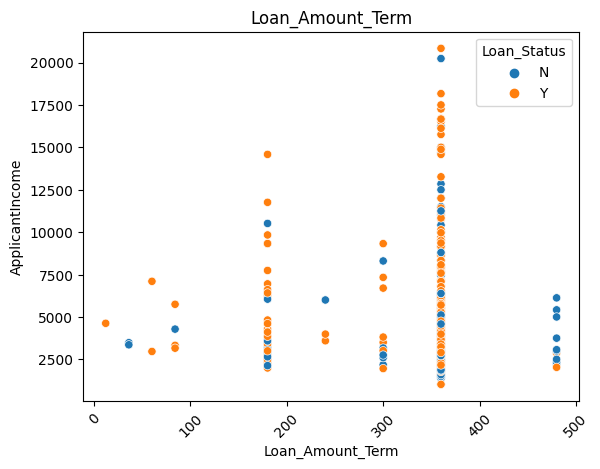

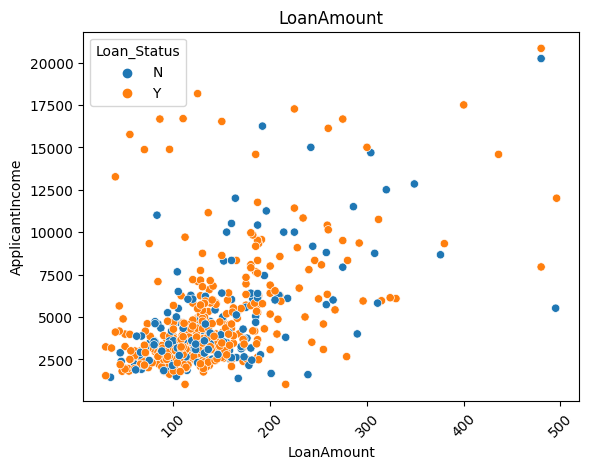

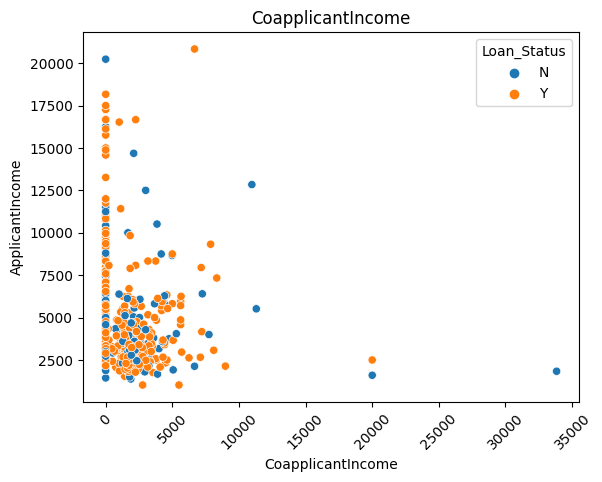

In [ ]:
#visualize all numerics_features columns
for c in numeric_features:
    sns.scatterplot(y=df['ApplicantIncome'], x = df[c], hue=df['Loan_Status'])
    plt.xticks(rotation=45)
    plt.title(f"{c}")
    plt.show()

In [ ]:
#select only the numeric columns in the DataFrame
df1 = df.select_dtypes(include=np.number)

**Heatmap** is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values

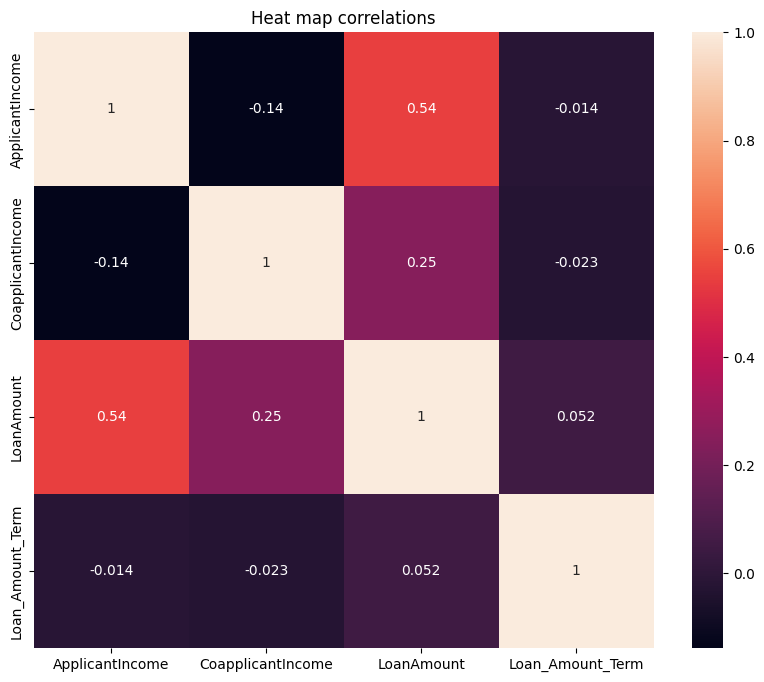

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True)
plt.title("Heat map correlations")
plt.show()

# **Preaper for ML**

In [ ]:
data = df[['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'LoanAmount', 'Loan_Amount_Term','Property_Area', 'Loan_Status']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Columns to perform label encoding on
columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'LoanAmount', 'Loan_Amount_Term','Property_Area', 'Loan_Status']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each column in columns_to_encode
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Print the DataFrame after label encoding
data.head()

<ipython-input-66-220bba5774b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])
<ipython-input-66-220bba5774b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])
<ipython-input-66-220bba5774b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,1,1,1,0,0,75,7,0,0
2,1,1,0,0,1,21,7,2,1
3,1,1,0,1,0,67,7,2,1
4,1,0,0,0,0,88,7,2,1
5,1,1,2,0,1,162,7,2,1


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
X =  data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [ ]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision, recall, f1, _ = precision_recall_fscore_support(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1 = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1))

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.6929
- Precision: 0.6369
- Recall: 0.6929
- F1 Score: 0.5875
----------------------------------
Model performance for Test set
- Accuracy: 0.6887
- Precision: 0.4966
- Recall: 0.6887
- F1 Score: 0.5771


Decision Tree
Model performance for Training set
- Accuracy: 0.9833
- Precision: 0.9842
- Recall: 0.9833
- F1 Score: 0.9835
----------------------------------
Model performance for Test set
- Accuracy: 0.6038
- Precision: 0.5707
- Recall: 0.6038
- F1 Score: 0.5845


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9833
- Precision: 0.9833
- Recall: 0.9833
- F1 Score: 0.9833
----------------------------------
Model performance for Test set
- Accuracy: 0.6887
- Precision: 0.6406
- Recall: 0.6887
- F1 Score: 0.6457


Support Vector Machine
Model performance for Training set
- Accuracy: 0.6929
- Precision: 0.4801
- Recall: 0.6929
- F1 Score: 0.5671
----------------------------------
Model performa

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBClassifier
Model performance for Training set
- Accuracy: 0.9595
- Precision: 0.9605
- Recall: 0.9595
- F1 Score: 0.9589
----------------------------------
Model performance for Test set
- Accuracy: 0.6132
- Precision: 0.5554
- Recall: 0.6132
- F1 Score: 0.5773


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.8476
- Precision: 0.8718
- Recall: 0.8476
- F1 Score: 0.8309
----------------------------------
Model performance for Test set
- Accuracy: 0.6981
- Precision: 0.6214
- Recall: 0.6981
- F1 Score: 0.6114


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.7619
- Precision: 0.7604
- Recall: 0.7619
- F1 Score: 0.7289
----------------------------------
Model performance for Test set
- Accuracy: 0.6509
- Precision: 0.5523
- Recall: 0.6509
- F1 Score: 0.5830






# **Model Optimization**

>Model Regularization on Randomforestclassifier

>Model Regularization on Xgbootclassifier

>Model Regularization on Support Vector Machine

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier with default settings
rf_model = RandomForestClassifier()

# Set hyperparameters for regularization
params = {
    'max_depth': 5,       # Maximum depth of a tree
    'min_samples_split': 2,  # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,   # Minimum number of samples required to be at a leaf node
    'max_features': 'auto',  # Number of features to consider when looking for the best split
    'bootstrap': True       # Whether bootstrap samples are used when building trees
}

# Update the model with the regularization parameters
rf_model.set_params(**params)

# Train and evaluate the model using your training and test data
rf_model.fit(X_train, y_train)


# Train and evaluate the model using your training data
y_train_pred_rf = rf_model.predict(X_train)
# Calculate performance metrics for training data
model_train_accuracy_rf, model_train_precision_rf, model_train_recall_rf, model_train_f1_rf = evaluate_model(y_train, y_train_pred_rf)

# Evaluate the model's performance on the test set
y_pred_rf = rf_model.predict(X_test)
# Calculate performance metrics for test data
model_test_accuracy_rf, model_test_precision_rf, model_test_recall_rf, model_test_f1_rf = evaluate_model(y_test, y_pred_rf)

# Print performance metrics for training data
print("Regularized Random Forest Model performance on training set:")
print(f"Accuracy: {model_train_accuracy_rf}")
print(f"Precision: {model_train_precision_rf}")
print(f"Recall: {model_train_recall_rf}")
print(f"F1 Score: {model_train_f1_rf}")
print("===================================")

# Print performance metrics for test data
print("Regularized Random Forest Model performance on test set:")
print(f"Accuracy: {model_test_accuracy_rf}")
print(f"Precision: {model_test_precision_rf}")
print(f"Recall: {model_test_recall_rf}")
print(f"F1 Score: {model_test_f1_rf}")

Regularized Random Forest Model performance on training set:
Accuracy: 0.7571428571428571
Precision: 0.8201744820065431
Recall: 0.7571428571428571
F1 Score: 0.6958550221708116
Regularized Random Forest Model performance on test set:
Accuracy: 0.7169811320754716
Precision: 0.7978436657681941
Recall: 0.7169811320754716
F1 Score: 0.6079009433962265


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize XGBoost classifier with default settings
xgb_model = XGBClassifier()

# Set hyperparameters for regularization
params = {
    'max_depth': 3,          # Maximum depth of a tree
    'min_child_weight': 1,   # Minimum sum of instance weight (Hessian) needed in a child
    'gamma': 0,              # Minimum loss reduction required to make a further partition
    'reg_alpha': 0.1         # L1 regularization term on weights
}

# Update the model with the regularization parameters
xgb_model.set_params(**params)

# Train the model using your training data
xgb_model.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Calculate performance metrics for training data
model_train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
model_train_precision_xgb = precision_score(y_train, y_train_pred_xgb, average='weighted')
model_train_recall_xgb = recall_score(y_train, y_train_pred_xgb, average='weighted')
model_train_f1_xgb = f1_score(y_train, y_train_pred_xgb, average='weighted')

# Calculate performance metrics for test data
model_test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
model_test_precision_xgb = precision_score(y_test, y_test_pred_xgb, average='weighted')
model_test_recall_xgb = recall_score(y_test, y_test_pred_xgb, average='weighted')
model_test_f1_xgb = f1_score(y_test, y_test_pred_xgb, average='weighted')

# Print performance metrics for training data
print("Regularized XGBoost Model performance on training set:")
print(f"Accuracy: {model_train_accuracy_xgb}")
print(f"Precision: {model_train_precision_xgb}")
print(f"Recall: {model_train_recall_xgb}")
print(f"F1 Score: {model_train_f1_xgb}")
print("===================================")

# Print performance metrics for test data
print("Regularized XGBoost Model performance on test set:")
print(f"Accuracy: {model_test_accuracy_xgb}")
print(f"Precision: {model_test_precision_xgb}")
print(f"Recall: {model_test_recall_xgb}")
print(f"F1 Score: {model_test_f1_xgb}")

Regularized XGBoost Model performance on training set:
Accuracy: 0.8595238095238096
Precision: 0.8671768707482993
Recall: 0.8595238095238096
F1 Score: 0.8497257869385371
Regularized XGBoost Model performance on test set:
Accuracy: 0.6415094339622641
Precision: 0.5620113301184513
Recall: 0.6415094339622641
F1 Score: 0.5873866699338397


In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM model with regularization
C_value = 1.0  # You can experiment with different values
svm_model_reg = SVC(C=C_value)
svm_model_reg.fit(X_train, y_train)

# Predict on training and test data
y_train_pred_svm_reg = svm_model_reg.predict(X_train)
y_test_pred_svm_reg = svm_model_reg.predict(X_test)

# Evaluate performance on training data
model_train_accuracy_svm_reg, model_train_precision_svm_reg, model_train_recall_svm_reg, model_train_f1_svm_reg = evaluate_model(y_train, y_train_pred_svm_reg)

# Evaluate performance on test data
model_test_accuracy_svm_reg, model_test_precision_svm_reg, model_test_recall_svm_reg, model_test_f1_svm_reg = evaluate_model(y_test, y_test_pred_svm_reg)

# Print performance metrics for training data
print("Regularized SVM Model performance on training set:")
print(f"Accuracy: {model_train_accuracy_svm_reg}")
print(f"Precision: {model_train_precision_svm_reg}")
print(f"Recall: {model_train_recall_svm_reg}")
print(f"F1 Score: {model_train_f1_svm_reg}")
print("===================================")

# Print performance metrics for test data
print("Regularized SVM Model performance on test set:")
print(f"Accuracy: {model_test_accuracy_svm_reg}")
print(f"Precision: {model_test_precision_svm_reg}")
print(f"Recall: {model_test_recall_svm_reg}")
print(f"F1 Score: {model_test_f1_svm_reg}")

Regularized SVM Model performance on training set:
Accuracy: 0.6928571428571428
Precision: 0.4800510204081633
Recall: 0.6928571428571428
F1 Score: 0.5671488848704038
Regularized SVM Model performance on test set:
Accuracy: 0.7075471698113207
Precision: 0.5006229975080099
Recall: 0.7075471698113207
F1 Score: 0.5863650578546857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
# Scale the data
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32)


Epoch 1/3
14/14 [==============================] - 3s 7ms/step - loss: 0.3715
Epoch 2/3
14/14 [==============================] - 0s 7ms/step - loss: 0.2275
Epoch 3/3
14/14 [==============================] - 0s 6ms/step - loss: 0.2210


4/4 [==============================] - 0s 3ms/step
Train RMSE:  0.465290112701981
Test RMSE:  0.4612020200023559


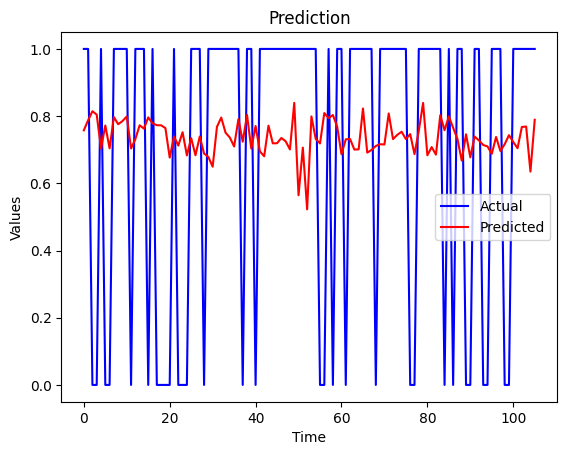

In [ ]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert the scaling
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model
train_rmse = np.sqrt(np.mean((train_predict - y_train)**2))
test_rmse = np.sqrt(np.mean((test_predict - y_test)**2))
print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

# Visualize the predictions
plt.plot(y_test, color='blue', label='Actual')
plt.plot(test_predict, color='red', label='Predicted')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


In [ ]:
### Create a Pickle file using serialization for Random Forest Classifier
import pickle
pickle_out = open("RandomForestClassifier.pkl","wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

### Create a Pickle file using serialization for XgbootClassifier
import pickle
pickle_out = open("XgbootClassifier.pkl","wb")
pickle.dump(xgb_model, pickle_out)
pickle_out.close()

### Create a Pickle file using serialization for Support Vector Machine
import pickle
pickle_out = open("SVM_reg.pkl","wb")
pickle.dump(svm_model_reg, pickle_out)
pickle_out.close()